<a href="https://colab.research.google.com/github/EduardoNobuhiro/NLP-problems/blob/main/I2A2_challenge.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive/MyDrive/Colab_Notebooks') 

ValueError: ignored

In [ ]:
import json
import os
import pandas as pd
import numpy as np
import string
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
import time
#A chave da sua api pode ser adquirida em https://www.kaggle.com/eduagarcia/account?isEditing=False
kaggle_json = {"username":"eduardoshitara","key":"f04f690e79e5059a764e9b04dc110bca"}

if not os.path.exists('/root/.kaggle'):
  os.makedirs('/root/.kaggle')
with open('/root/.kaggle/kaggle.json', 'w') as f:
  json.dump(kaggle_json, f)

In [ ]:
os.chmod('/root/.kaggle/kaggle.json', 600)

In [ ]:
!kaggle competitions download -c i2a2-nlp-2021-text-classification

  0% 0.00/1.55M [00:00<?, ?B/s]
100% 1.55M/1.55M [00:00<00:00, 51.6MB/s]
 99% 706M/716M [00:07<00:00, 72.7MB/s]
100% 716M/716M [00:07<00:00, 94.3MB/s]
 78% 5.00M/6.41M [00:00<00:00, 45.7MB/s]
100% 6.41M/6.41M [00:00<00:00, 40.9MB/s]


In [ ]:
!unzip -o train.csv.zip
!unzip -o test.csv.zip
#!unzip -o sample_submission.csv.zip

Archive:  train.csv.zip
  inflating: train.csv               
Archive:  test.csv.zip
  inflating: test.csv                


In [ ]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')
train.head(n=10)

,id,title,label_quality,language,category
0,0,Hidrolavadora Lavor One 120 Bar 1700w Bomba A...,unreliable,spanish,ELECTRIC_PRESSURE_WASHERS
1,1,Placa De Sonido - Behringer Umc22,unreliable,spanish,SOUND_CARDS
2,2,Maquina De Lavar Electrolux 12 Kilos,unreliable,portuguese,WASHING_MACHINES
3,3,Par Disco De Freio Diant Vent Gol 8v 08/ Frema...,unreliable,portuguese,VEHICLE_BRAKE_DISCS
4,4,Flashes Led Pestañas Luminoso Falso Pestañas P...,unreliable,spanish,FALSE_EYELASHES
5,5,"4 Microaspersor Irrigação Ultra 7,20 Metros",unreliable,portuguese,IRRIGATION_SPRINKLERS
6,6,Raquete Clash 100 Tour - Nova,unreliable,portuguese,RACQUETS
7,7,"Kit Tripe Para Celular Ou Câmera Fotog 1,20m +...",unreliable,portuguese,CAMERA_TRIPODS
8,8,Filtro Ar Bonanza 1984/1990 Sar3589,unreliable,portuguese,AUTOMOTIVE_AIR_FILTERS
9,9,Gatito Lunchera Neoprene,unreliable,spanish,LUNCHBOXES


In [ ]:
label_quality_n = train['label_quality'].unique()
language_n = train['language'].unique()
category_n = train['category'].unique()
print("label_quality: ", label_quality_n)
print("languages: ", language_n)
print("Number of categories: ", category_n)

label_quality:  ['unreliable' 'reliable']
languages:  ['spanish' 'portuguese']
Number of categories:  ['ELECTRIC_PRESSURE_WASHERS' 'SOUND_CARDS' 'WASHING_MACHINES' ...
 'HAMBURGER_FORMERS' 'MANUAL_TROLLEYS' 'COMMERCIAL_POPCORN_MACHINES']


spanish       9902015
portuguese    9861136
Name: language, dtype: int64
Percentages:  [50.10342227 49.89657773]


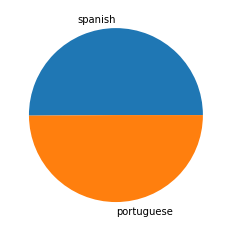

In [ ]:
language_freq = train['language'].value_counts()
print(language_freq)
print('Percentages: ', language_freq.values*100/np.sum(language_freq.values))
plt = plt.pie(language_freq.values, labels=language_freq.index)

In [ ]:
#text = 'o desafio é tirar x o desenvolvimento caximbo'
#text=remove_isolated_letter(text)
#print(text)
train.shape

(19763151, 5)

In [ ]:
import re
import string
string.number='x'
def remove_URL(text):
    url = re.compile(r"https?://\S+|www\.\S+")
    return url.sub(r"", text)

# https://stackoverflow.com/questions/34293875/how-to-remove-punctuation-marks-from-a-string-in-python-3-x-using-translate/34294022
def remove_punct(text):
    '''Make text lowercase, remove text in square brackets, remove punctuation and remove words containing numbers.'''
    text = text.lower()
    text = re.sub('\[.*?\]', '', text)
    text = re.sub('[%s]' % re.escape(string.punctuation), '', text)
    text = re.sub('\w*\d\w*', '', text)
    return text
def remove_isolated_letter(text):
    text = re.sub(r' x ', ' ', text)
    text = re.sub(r' y ', ' ',text)
    text = re.sub(r' c ', ' ', text)
    text = re.sub(r' p ', ' ', text)
    text = re.sub(r'  ', ' ', text)
    text = re.sub(r' l ', ' ', text)
    return text
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [ ]:
train["title"] = train.title.map(remove_URL) # map(lambda x: remove_URL(x))
train["title"] = train.title.map(remove_punct)
train["title"] = train.title.map(remove_isolated_letter)
train.head(n=100)

,id,title,label_quality,language,category
0,0,hidrolavadora lavor one bar bomba aluminio it...,unreliable,spanish,ELECTRIC_PRESSURE_WASHERS
1,1,placa de sonido behringer,unreliable,spanish,SOUND_CARDS
2,2,maquina de lavar electrolux kilos,unreliable,portuguese,WASHING_MACHINES
3,3,par disco de freio diant vent gol fremax,unreliable,portuguese,VEHICLE_BRAKE_DISCS
4,4,flashes led pestañas luminoso falso pestañas p...,unreliable,spanish,FALSE_EYELASHES
...,...,...,...,...,...
95,95,griferia baño ducha embutir piazza modelo optima,unreliable,spanish,SHOWER_HEADS
96,96,sabonete natura homem essence unidades cada,unreliable,portuguese,BAR_SOAPS
97,97,avent combo outside mixvasch,unreliable,spanish,BABY_STERILIZERS
98,98,silla eames acrílico rojo ¡oportunidad,unreliable,spanish,DINING_CHAIRS


In [ ]:
# remove stopwords
!pip install nltk
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords

# Stop Words: A stop word is a commonly used word (such as “the”, “a”, “an”, “in”) that a search engine
# has been programmed to ignore, both when indexing entries for searching and when retrieving them 
# as the result of a search query.
stop = set(stopwords.words("portuguese"))
stop_es = set(stopwords.words("spanish"))
# https://stackoverflow.com/questions/5486337/how-to-remove-stop-words-using-nltk-or-python
def remove_stopwords(text):
    filtered_words = [word.lower() for word in text.split() if word.lower() not in stop]
    return " ".join(filtered_words)
def remove_stopwords_es(text):
    filtered_words = [word.lower() for word in text.split() if word.lower() not in stop_es]
    return " ".join(filtered_words)


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [ ]:
train["title"] = train.title.map(remove_stopwords)
train["title"] = train.title.map(remove_stopwords_es)
train.head(n=10)

,id,title,label_quality,language,category
0,0,hidrolavadora lavor one bar bomba aluminio italia,unreliable,spanish,ELECTRIC_PRESSURE_WASHERS
1,1,placa sonido behringer,unreliable,spanish,SOUND_CARDS
2,2,maquina lavar electrolux kilos,unreliable,portuguese,WASHING_MACHINES
3,3,par disco freio diant vent gol fremax,unreliable,portuguese,VEHICLE_BRAKE_DISCS
4,4,flashes led pestañas luminoso falso pestañas p...,unreliable,spanish,FALSE_EYELASHES
5,5,microaspersor irrigação ultra metros,unreliable,portuguese,IRRIGATION_SPRINKLERS
6,6,raquete clash tour nova,unreliable,portuguese,RACQUETS
7,7,kit tripe celular câmera fotog brinde nfe,unreliable,portuguese,CAMERA_TRIPODS
8,8,filtro ar bonanza,unreliable,portuguese,AUTOMOTIVE_AIR_FILTERS
9,9,gatito lunchera neoprene,unreliable,spanish,LUNCHBOXES


In [ ]:
train_pt = train[train['language'] == 'portuguese'].copy()
train_es = train[train['language'] == 'spanish'].copy()
test_pt = test[train['language'] == 'portuguese'].copy()
test_es = test[train['language'] == 'portuguese'].copy()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  after removing the cwd from sys.path.


In [ ]:
train_size = int(train_pt.shape[0] * 0.8)

train_df_pt = train_pt[:train_size]
val_df_pt = train_pt[train_size:]

# split text and labels
train_sentences_pt = train_df_pt.title.to_numpy()
train_labels_pt = train_df_pt.category.to_numpy()
val_sentences_pt = val_df_pt.title.to_numpy()
val_labels_pt = val_df_pt.category.to_numpy()
train_sentences_pt.shape, train_labels_pt.shape, val_sentences_pt.shape, val_labels_pt.shape

((7888908,), (7888908,), (1972228,), (1972228,))

In [ ]:
train_size = int(train_es.shape[0] * 0.8)

train_df_es = train_es[:train_size]
val_df_es = train_es[train_size:]

# split text and labels
train_sentences_es = train_df_es.title.to_numpy()
train_labels_es = train_df_es.category.to_numpy()
val_sentences_es = val_df_es.title.to_numpy()
val_labels_es = val_df_es.category.to_numpy()

In [ ]:
from tensorflow.keras.preprocessing.text import Tokenizer

# vectorize a text corpus by turning each text into a sequence of integers
tokenizer_pt = Tokenizer()
tokenizer_pt.fit_on_texts(train_sentences_pt) # fit only to training
tokenizer_es = Tokenizer()
tokenizer_es.fit_on_texts(train_sentences_es) # fit only to training

In [ ]:
# each word has unique index
word_index = tokenizer.word_index
len(word_index)

NameError: ignored

In [ ]:
#num_unique_words=len(tokenizer_I2A2_chal.word_index)1024555
num_unique_words_pt=len(tokenizer_pt.word_index)
num_unique_words_es=len(tokenizer_es.word_index)
num_unique_words_pt, num_unique_words_es

(506391, 656302)

In [ ]:
train_sequences_pt= tokenizer_pt.texts_to_sequences(train_sentences_pt)
val_sequences_pt= tokenizer_pt.texts_to_sequences(val_sentences_pt)
train_sequences_es= tokenizer_es.texts_to_sequences(train_sentences_es)
val_sequences_es= tokenizer_es.texts_to_sequences(val_sentences_es)

In [ ]:
# Pad the sequences to have the same length
from tensorflow.keras.preprocessing.sequence import pad_sequences

# Max number of words in a sequence
max_length = 15

train_padded_pt = pad_sequences(train_sequences_pt, maxlen=max_length, padding="post", truncating="post")
val_padded_pt = pad_sequences(val_sequences_pt, maxlen=max_length, padding="post", truncating="post")

In [ ]:
train_padded_es = pad_sequences(train_sequences_es, maxlen=max_length, padding="post", truncating="post")
val_padded_es = pad_sequences(val_sequences_es, maxlen=max_length, padding="post", truncating="post")
train_padded_es.shape, val_padded_es.shape

((7921612, 15), (1980403, 15))

In [ ]:
print(train_sentences_pt[115])
print(train_sequences_pt[115])
print(train_padded_pt[115])

sal rosa do himalaia grosso kg promoção 
[1453, 44, 10, 2869, 1542, 105, 33]
[1453   44   10 2869 1542  105   33    0    0    0    0    0    0    0
    0]


In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
cv_challengeI2A2= CountVectorizer(lowercase=False)
cv_challengeI2A2.fit(train['category'])

CountVectorizer(analyzer='word', binary=False, decode_error='strict',
                dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
                lowercase=False, max_df=1.0, max_features=None, min_df=1,
                ngram_range=(1, 1), preprocessor=None, stop_words=None,
                strip_accents=None, token_pattern='(?u)\\b\\w\\w+\\b',
                tokenizer=None, vocabulary=None)

In [ ]:
train_labels_es=cv_challengeI2A2.transform(train_labels_es)
val_labels_es=cv_challengeI2A2.transform(val_labels_es)
train_labels_pt=cv_challengeI2A2.transform(train_labels_pt)
val_labels_pt=cv_challengeI2A2.transform(val_labels_pt)

In [ ]:
from sklearn.externals import joblib
from google.colab import files

#you can save variable into file on colab files
joblib.dump(num_unique_words_pt,  'num_unique_words_pt.pkl')
joblib.dump(num_unique_words_es,  'num_unique_words_es.pkl')
joblib.dump(train_padded_pt,  'train_padded_pt.pkl')
joblib.dump(val_padded_pt,  'val_padded_pt.pkl') 
joblib.dump(train_padded_es,  'train_padded_es.pkl')
joblib.dump(val_padded_es,  'val_padded_es.pkl') 
joblib.dump(tokenizer_pt, 'tokenizer_I2A2_chal_pt.pkl')
joblib.dump(tokenizer_es, 'tokenizer_I2A2_chal_es.pkl')
joblib.dump(train_labels_es, 'train_labels_es.pkl')
joblib.dump(val_labels_es, 'val_labels_es.pkl')
joblib.dump(train_labels_pt, 'train_labels_pt.pkl')
joblib.dump(val_labels_pt, 'val_labels_pt.pkl')
joblib.dump(cv_challengeI2A2,  'cv_challengeI2A2.pkl')

#this will download file to your local downloads

#files.download('var.pkl')      

#reload your saved data.
#tokenizer_I2A2_chal=joblib.load('tokenizer_I2A2_chal.pkl')
#train_padded = joblib.load('val_padded.pkl')
#val_padded = joblib.load('val_padded.pkl') 
#train_labels=joblib.load('train_labels.pkl')
#val_labels=joblib.load('val_labels.pkl')

['cv_challengeI2A2.pkl']

In [ ]:
from sklearn.externals import joblib
from google.colab import files
#reload your saved data.
#train_padded_pt=joblib.load('train_padded_pt.pkl')
#val_padded_pt=joblib.load('val_padded_pt.pkl') 
train_padded_es=joblib.load('train_padded_es.pkl')
val_padded_es=joblib.load('val_padded_es.pkl') 
#tokenizer_pt=joblib.load('tokenizer_I2A2_chal_pt.pkl')#
#tokenizer_es=joblib.load(tokenizer_es, 'tokenizer_I2A2_chal_pt.pkl')
#train_labels_pt=joblib.load('train_labels_pt.pkl')
#val_labels_pt=joblib.load('val_labels_pt.pkl')
train_labels_es=joblib.load('train_labels_es.pkl')
val_labels_es=joblib.load('val_labels_es.pkl')
#cv_challengeI2A2=joblib.load('cv_challengeI2A2.pkl')
#num_unique_words_pt=joblib.load('num_unique_words_pt.pkl')
num_unique_words_es=joblib.load('num_unique_words_es.pkl')

In [ ]:
#decoded_text = decode(train_sequences[10])
import numpy as np
#print(train_sequences[10])
#print(decoded_text)
max_length=15
output_model=1588

In [ ]:
# Create LSTM model
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

# Embedding: https://www.tensorflow.org/tutorials/text/word_embeddings
# Turns positive integers (indexes) into dense vectors of fixed size. (other approach could be one-hot-encoding)

# Word embeddings give us a way to use an efficient, dense representation in which similar words have 
# a similar encoding. Importantly, you do not have to specify this encoding by hand. An embedding is a 
# dense vector of floating point values (the length of the vector is a parameter you specify).

model_es = tf.keras.Sequential([
tf.keras.layers.Embedding(num_unique_words_es,100, input_length=max_length),
#model.add(keras.Input(shape=train_padded_pt.shape)) # seq_length, input_size
#model.add(layers.SimpleRNN(15,activation='relu'))
#tf.keras.layers.GlobalAveragePooling1D(),
tf.keras.layers.LSTM(100, activation='relu'),
tf.keras.layers.Dense(output_model,activation='softmax')
])
model_es.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, 15, 100)           65630200  
_________________________________________________________________
lstm (LSTM)                  (None, 100)               80400     
_________________________________________________________________
dense (Dense)                (None, 1588)              160388    
Total params: 65,870,988
Trainable params: 65,870,988
Non-trainable params: 0
_________________________________________________________________


In [ ]:
loss = keras.losses.CategoricalCrossentropy(name='categorical_crossentropy')
metrics = ["accuracy"]
opt=('Adam')

model_es.compile(loss=loss,optimizer=opt, metrics=metrics)

In [ ]:
model_es.load_weights('/content/drive/MyDrive/Colab_Notebooks/Models/Model_es')

In [ ]:
count = 0
while count < 5:
  train_padded_es_1=train_padded_es[6000000+count*200000:6200000+count*200000]
  train_labels_es_1=train_labels_es[6000000+count*200000:6200000+count*200000]
  model_es.fit(train_padded_es_1,train_labels_es_1.toarray(),batch_size=100, epochs=2)
  print(6200000+count*200000)
  model_es.save_weights('/content/drive/MyDrive/Colab_Notebooks/Models/Model_es')
  count += 1


Epoch 1/2
2000/2000 [==============================] - 1288s 642ms/step - loss: 0.6882 - accuracy: 0.8581
Epoch 2/2
2000/2000 [==============================] - 1292s 646ms/step - loss: 0.4235 - accuracy: 0.9045
6200000
Epoch 1/2
2000/2000 [==============================] - 1337s 668ms/step - loss: 0.6867 - accuracy: 0.8576
Epoch 2/2
2000/2000 [==============================] - 1327s 663ms/step - loss: 0.4239 - accuracy: 0.9040
6400000
Epoch 1/2
2000/2000 [==============================] - 1329s 665ms/step - loss: 0.6896 - accuracy: 0.8566
Epoch 2/2
2000/2000 [==============================] - 1322s 661ms/step - loss: 0.4263 - accuracy: 0.9025
6600000
Epoch 1/2


In [ ]:
# Create LSTM model
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

# Embedding: https://www.tensorflow.org/tutorials/text/word_embeddings
# Turns positive integers (indexes) into dense vectors of fixed size. (other approach could be one-hot-encoding)

# Word embeddings give us a way to use an efficient, dense representation in which similar words have 
# a similar encoding. Importantly, you do not have to specify this encoding by hand. An embedding is a 
# dense vector of floating point values (the length of the vector is a parameter you specify).

model_pt = tf.keras.Sequential([
tf.keras.layers.Embedding(num_unique_words_pt,50, input_length=max_length),
#model.add(keras.Input(shape=train_padded_pt.shape)) # seq_length, input_size
#model.add(layers.SimpleRNN(15,activation='relu'))
#tf.keras.layers.GlobalAveragePooling1D(),
tf.keras.layers.LSTM(100, activation='relu'),
tf.keras.layers.Dense(output_model,activation='softmax')
])
model.summary()

NameError: ignored

In [ ]:
train_padded_pt_1=train_padded_pt[8000000:8500000]
train_labels_pt_1=train_labels_pt[8000000:8500000]
train_padded_pt_1,train_labels_pt_1

(array([], shape=(0, 15), dtype=int32),
 <0x1588 sparse matrix of type '<class 'numpy.int64'>'
 	with 0 stored elements in Compressed Sparse Row format>)

In [ ]:
count = 0
while count < 5:
  train_padded_pt_1=train_padded_pt[1400000+count*200000:1600000+count*200000]
  train_labels_pt_1=train_labels_pt[1400000+count*200000:1600000+count*200000]
  model.fit(train_padded_pt_1,train_labels_pt_1.toarray(),batch_size=100, epochs=4)
  print(1600000+count*200000)
  model.save_weights('/content/drive/MyDrive/Colab_Notebooks/Models/')
  count += 1


Epoch 1/4
2000/2000 [==============================] - 174s 86ms/step - loss: 0.7664 - accuracy: 0.8399
Epoch 2/4
2000/2000 [==============================] - 166s 83ms/step - loss: 0.6547 - accuracy: 0.8584
Epoch 3/4
2000/2000 [==============================] - 168s 84ms/step - loss: 0.5863 - accuracy: 0.8708
Epoch 4/4
2000/2000 [==============================] - 167s 84ms/step - loss: 0.5298 - accuracy: 0.8817
1600000
Epoch 1/4
2000/2000 [==============================] - 166s 83ms/step - loss: 0.7564 - accuracy: 0.8411
Epoch 2/4
2000/2000 [==============================] - 167s 83ms/step - loss: 0.6464 - accuracy: 0.8611
Epoch 3/4
2000/2000 [==============================] - 166s 83ms/step - loss: 0.5789 - accuracy: 0.8728
Epoch 4/4
2000/2000 [==============================] - 167s 83ms/step - loss: 0.5233 - accuracy: 0.8834
1800000
Epoch 1/4
2000/2000 [==============================] - 164s 82ms/step - loss: 0.7565 - accuracy: 0.8402
Epoch 2/4
2000/2000 [===========================

In [ ]:
count = 0
while count < 5:
  val_padded_pt_1=val_padded_pt[0+count*200000:200000+count*200000]
  val_labels_pt_1=val_labels_pt[0+count*200000:200000+count*200000]
  model.evaluate(val_padded_pt_1,val_labels_pt_1.toarray())
  print(0+count*200000)
  count += 1

6250/6250 [==============================] - 40s 6ms/step - loss: 0.8273 - accuracy: 0.8337
0
6250/6250 [==============================] - 40s 6ms/step - loss: 0.8393 - accuracy: 0.8314
200000
6250/6250 [==============================] - 40s 6ms/step - loss: 0.8161 - accuracy: 0.8352
400000
6250/6250 [==============================] - 40s 6ms/step - loss: 0.8293 - accuracy: 0.8322
600000


In [ ]:
loss = keras.losses.CategoricalCrossentropy(name='categorical_crossentropy')
metrics = ["accuracy"]
opt=('Adam')

model_pt.compile(loss=loss,optimizer=opt, metrics=metrics)

NameError: ignored